# Data science hiring test of hackerrank 1

## Librerias

In [53]:
# Librerias
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

## Procesamiento de datos

In [54]:
# Cargamos el data frame
df = pd.read_csv("train.csv", index_col=0)

In [55]:
print(df.shape)
print(df.info())

(362, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 362 entries, 0 to 461
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   surface_area                   362 non-null    float64
 1   agricultural_land              358 non-null    float64
 2   forest_area                    357 non-null    float64
 3   armed_forces_total             318 non-null    float64
 4   urban_pop_major_cities         360 non-null    float64
 5   urban_pop_minor_cities         360 non-null    float64
 6   national_income                362 non-null    object 
 7   inflation_annual               146 non-null    float64
 8   inflation_monthly              156 non-null    float64
 9   inflation_weekly               20 non-null     float64
 10  mobile_subscriptions           362 non-null    object 
 11  internet_users                 362 non-null    object 
 12  secure_internet_servers_total  352 non-null  

In [56]:
# Contar valor nulos y Nas
df.isnull().sum()

surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

In [57]:
# Extraigo los casos en dondehay muchos datos faltantes
df = df.drop(['inflation_annual', 'inflation_monthly', 'inflation_weekly'], axis=1)
df.isnull().sum()

surface_area                      0
agricultural_land                 4
forest_area                       5
armed_forces_total               44
urban_pop_major_cities            2
urban_pop_minor_cities            2
national_income                   0
mobile_subscriptions              0
internet_users                    0
secure_internet_servers_total    10
improved_sanitation               0
women_parliament_seats_rate       0
life_expectancy                   0
dtype: int64

In [58]:
# Imputacion de datos faltantes por la media de cada columna
df = df.fillna(df.mean(numeric_only=True))
df.isnull().sum()


surface_area                     0
agricultural_land                0
forest_area                      0
armed_forces_total               0
urban_pop_major_cities           0
urban_pop_minor_cities           0
national_income                  0
mobile_subscriptions             0
internet_users                   0
secure_internet_servers_total    0
improved_sanitation              0
women_parliament_seats_rate      0
life_expectancy                  0
dtype: int64

In [59]:
df.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1.379000e+06,55.747169,4.688831,unknown,less than 1 per person,0 per 1000 people,2.949654e+08,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,1.650000e+04,16.890687,23.136313,very low,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,9.849864e+05,18.390090,23.139910,unknown,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1.518650e+06,50.966885,24.522427,high,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,9.849864e+05,5.311885,30.271115,unknown,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


## Modelo




## Las variables inflacion anual, mensual y semanal tiene muchos na
 Agricutral land, forest_area,  armed_forces_total , urban major and minor and secure internet
tiene pocas NA, los podemos reemplazar por la media 

In [60]:
df.describe()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,secure_internet_servers_total,life_expectancy
count,3.620000e+02,3.620000e+02,3.620000e+02,3.620000e+02,362.000000,362.000000,3.620000e+02,362.000000
mean,4.021884e+06,1.594881e+08,1.204151e+08,9.849864e+05,27.659456,29.175242,2.949654e+08,71.059691
std,1.234491e+07,4.936564e+08,3.770239e+08,2.806256e+06,20.455984,21.147669,7.133108e+08,8.332818
min,3.030000e+01,3.000000e+02,0.000000e+00,5.000000e+01,0.091444,0.074575,4.002500e+04,48.850634
25%,2.783000e+04,1.101326e+06,5.083646e+05,1.585000e+04,10.637942,11.033595,3.522556e+06,65.469854
50%,2.037745e+05,5.506865e+06,4.012868e+06,8.659000e+04,24.545311,26.969871,2.911352e+07,73.238024
75%,1.081610e+06,4.286507e+07,2.347027e+07,9.849864e+05,38.463620,43.299790,2.508172e+08,77.125610
max,1.343253e+08,5.067600e+09,4.132117e+09,2.720662e+07,92.409069,89.142904,8.207343e+09,83.480488


In [36]:
# Descripción general de los datos
df.groupby('improved_sanitation')[['life_expectancy']].describe()

life_expectancy                                  \
                              count       mean       std        min   
improved_sanitation                                                   
high access                    47.0  73.247753  3.075589  65.427780   
low access                     55.0  61.828680  4.835226  49.331463   
medium access                  54.0  67.649673  6.740083  48.850634   
no info                        18.0  75.682654  8.843511  54.690244   
very high access              155.0  77.020089  3.858466  68.104000   
very low access                33.0  58.390987  4.371564  49.105293   

                                                                 
                           25%        50%        75%        max  
improved_sanitation                                              
high access          71.942106  73.839585  74.464634  80.128878  
low access           58.317622  62.033390  66.069134  69.102927  
medium access        64.672562  69.060368  72.091201  77.419220  
no info              73.552823  79.670305  81.141463  83.480488  
very high access     74.170524  76.836195  80.642291  83.331951  
very low access      57.095000  59.121976  61.666390  64.291829

### Comentarios

### Verifcar correlación 

                               surface_area  agricultural_land  forest_area  \
surface_area                       1.000000           0.986713     0.982887   
agricultural_land                  0.986713           1.000000     0.955918   
forest_area                        0.982887           0.955918     1.000000   
armed_forces_total                 0.928480           0.950516     0.885896   
urban_pop_major_cities                  NaN                NaN          NaN   
urban_pop_minor_cities                  NaN                NaN          NaN   
secure_internet_servers_total           NaN                NaN          NaN   
life_expectancy                         NaN                NaN          NaN   

                               armed_forces_total  urban_pop_major_cities  \
surface_area                             0.928480                     NaN   
agricultural_land                        0.950516                     NaN   
forest_area                              0.885896        

<AxesSubplot:>

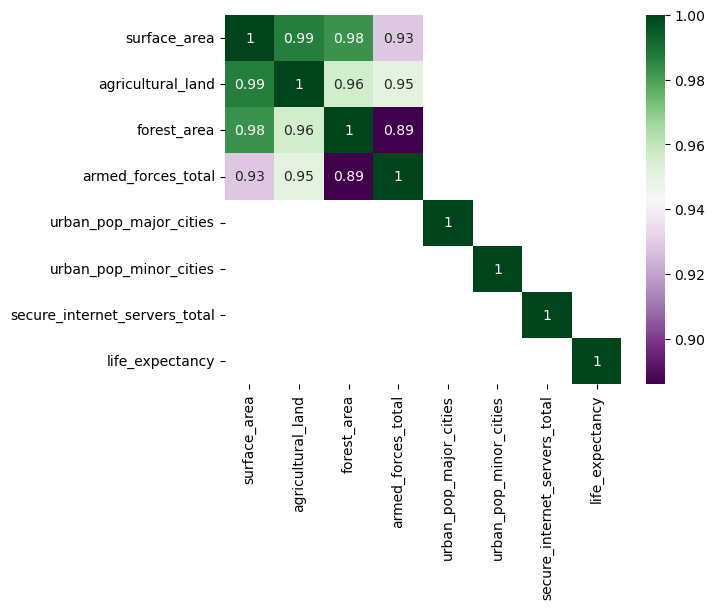

In [37]:
# high_corr = corr_matrix[(np.abs(corr_matrix) > 0.85) & (corr_matrix != 1.0)]
c = df.select_dtypes(include = 'number').corr()
c_high = c[np.abs(c)>0.85]
print(c_high)
sns.heatmap(c_high, cmap = 'PRGn', annot = True)

## Alta correlación 
Posiblemente multicolinearidad

-   forest_area. Solo dejaremos ` agricultural_land`

In [38]:
out = ['surface_area',  'agricultural_land']   
df = df.drop(columns = out).reset_index(drop = True)

## Data Visualization

<AxesSubplot:title={'center':'life_expectancy'}, xlabel='women_parliament_seats_rate'>

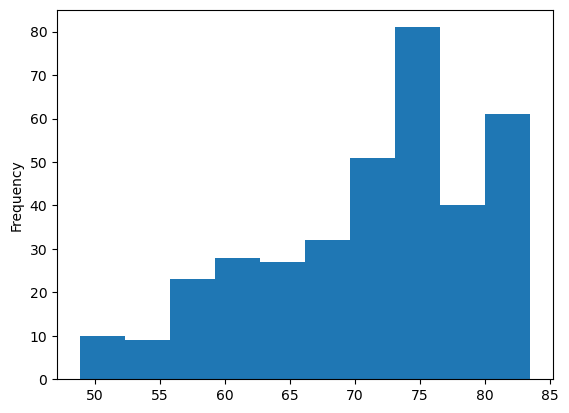

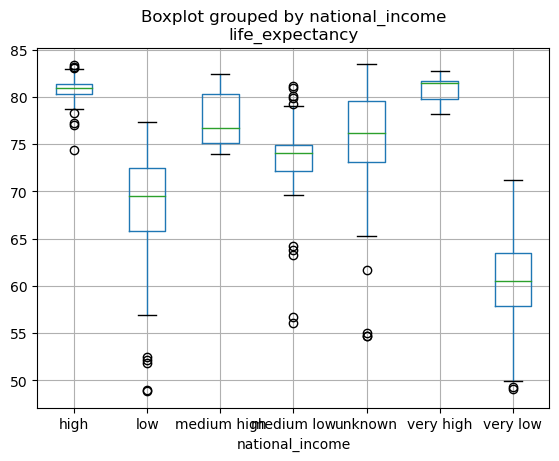

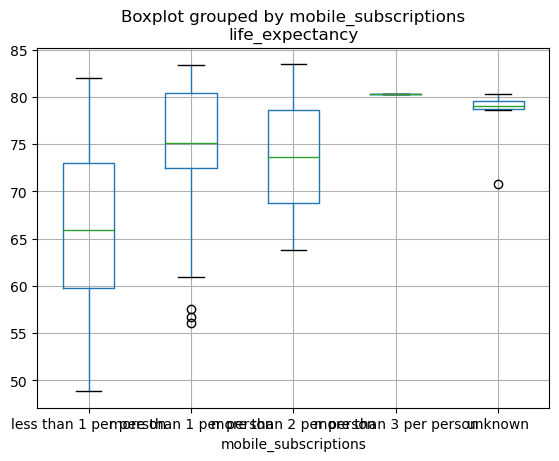

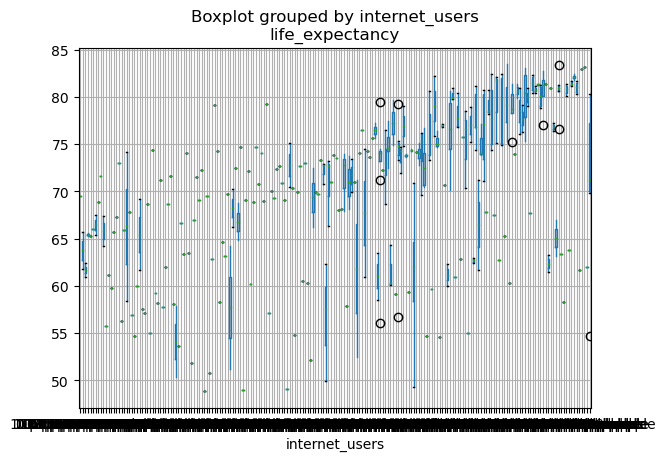

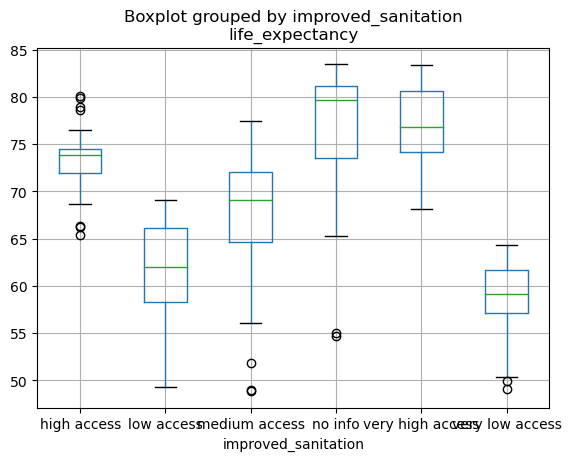

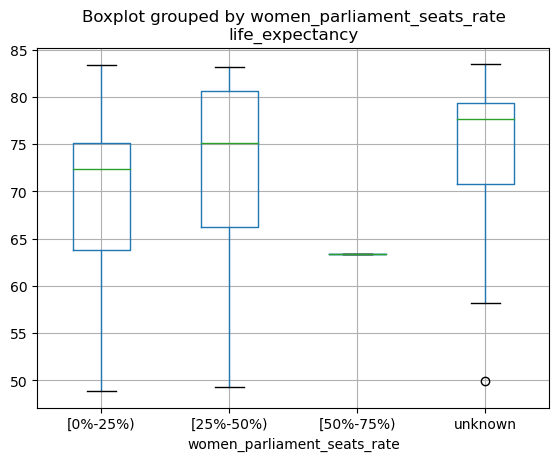

In [39]:
# Histogama de esperanza de vida
df['life_expectancy'].plot.hist()
df.boxplot(column='life_expectancy', by = 'national_income')
df.boxplot(column='life_expectancy', by = 'mobile_subscriptions')
df.boxplot(column='life_expectancy', by = 'internet_users')
df.boxplot(column='life_expectancy', by = 'improved_sanitation')
df.boxplot(column='life_expectancy', by = 'women_parliament_seats_rate')

In [ ]:
# Frecuencias de casos por factores 
print(df['internet_users'].value_counts())
print(df['women_parliament_seats_rate'].value_counts())

internet_users
41 per 100 people      8
60 per 100 people      7
46 per 100 people      7
unknown                6
66 per 100 people      5
                      ..
64 per 1000 people     1
154 per 1000 people    1
37 per 1000 people     1
30 per 1000 people     1
374 per 1000 people    1
Name: count, Length: 198, dtype: int64
women_parliament_seats_rate
[0%-25%)     249
[25%-50%)     82
unknown       30
[50%-75%)      1
Name: count, dtype: int64


In [41]:
# df para el modelo
# df_sin_fila = df[df['x'] != 'a'].reset_index(drop=True)

df = df[df['women_parliament_seats_rate'] != '[50%-75%)'].reset_index(drop=True)
df['women_parliament_seats_rate'].value_counts()

women_parliament_seats_rate
[0%-25%)     249
[25%-50%)     82
unknown       30
Name: count, dtype: int64

In [42]:
df = df.drop(['internet_users'], axis=1)

In [43]:
print(df[['women_parliament_seats_rate']].value_counts())
print(
df[['improved_sanitation']].value_counts())
print(
df[['national_income']].value_counts())
print(
df[['mobile_subscriptions']].value_counts())

women_parliament_seats_rate
[0%-25%)                       249
[25%-50%)                       82
unknown                         30
Name: count, dtype: int64
improved_sanitation
very high access       155
low access              55
medium access           53
high access             47
very low access         33
no info                 18
Name: count, dtype: int64
national_income
low                81
medium low         76
very low           76
unknown            48
high               37
medium high        31
very high          12
Name: count, dtype: int64
mobile_subscriptions  
more than 1 per person    188
less than 1 per person    163
unknown                     7
more than 2 per person      2
more than 3 per person      1
Name: count, dtype: int64


In [44]:
print(df.select_dtypes(exclude='number').columns)

Index(['national_income', 'mobile_subscriptions', 'improved_sanitation',
       'women_parliament_seats_rate'],
      dtype='object')


## Daremos un ejemplo
 Over sampling con "national_income"

##
desbalanceada : mobile_subscriptions, etc.


In [45]:
col = 'national_income'
max_size = df[col].value_counts().max()
# Agrupamos
df_over = (
    df.groupby(col)
    .apply(lambda x: x.sample(n=max_size, replace = True, random_state=52))
    .reset_index(drop=True)
)

In [46]:
df_over['national_income'].value_counts()

national_income
high           81
low            81
medium high    81
medium low     81
unknown        81
very high      81
very low       81
Name: count, dtype: int64

In [47]:
# oversamplig para las otras

## encoding

In [48]:
no_num= ['national_income', 'mobile_subscriptions', 'improved_sanitation',
       'women_parliament_seats_rate']

# Codificador
encoder = OrdinalEncoder()

# Codificar las columnas no numéricas
df_over[no_num] = encoder.fit_transform(df_over[no_num])

## Entrenamiento del modelo

- Y: esperanza de vida
--- 

- X: surface_area ,  agricultural_land  ,  forest_area 
armed_forces_total               
urban_pop_major_cities           
urban_pop_minor_cities 
secure_internet_servers_total          
---

- Factors: 
national_income                  
mobile_subscriptions                               
improved_sanitation              
women_parliament_seats_rate           
$$
Y \sim X +  Factores + ruido
$$


In [49]:
df_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   forest_area                    567 non-null    float64
 1   armed_forces_total             567 non-null    float64
 2   urban_pop_major_cities         567 non-null    float64
 3   urban_pop_minor_cities         567 non-null    float64
 4   national_income                567 non-null    float64
 5   mobile_subscriptions           567 non-null    float64
 6   secure_internet_servers_total  567 non-null    float64
 7   improved_sanitation            567 non-null    float64
 8   women_parliament_seats_rate    567 non-null    float64
 9   life_expectancy                567 non-null    float64
dtypes: float64(10)
memory usage: 44.4 KB


In [50]:
# 
Y = df_over['life_expectancy']
X = df_over.drop('life_expectancy', axis=1)

# División de los datos en train y test 


In [ ]:
# Dividimos los datos en train y test las matrices X e Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=52)

# Cargamos el objeto del modelo
random_forest = RandomForestRegressor(random_state=52)

# Hiperparámetros para explorar
param_grid = {
    'n_estimators':[10, 50, 100],
    'max_depth': [5,10, None],
    'min_samples_split': [2,5, 10]
}

# Busqueda con validación cruzada (6 hojas)
grid = GridSearchCV(random_forest, param_grid,cv=4, scoring='neg_root_mean_squared_error', n_jobs=1)
grid.fit(X_train, Y_train)

# Mejor modelo
mejor_modelo = grid.best_estimator_


# Predicciones
Y_pred = mejor_modelo.predict(X_test)

# MAE en el data de test
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mejores parametros:{grid.best_params_}")
print(f"Test MAE:{mae:.2f}")



Mejores parametros:{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


NameError: name 'rmse' is not defined

In [61]:
modelo_select = RandomForestRegressor(max_depth=10, min_samples_split = 2, n_estimators=100,
                 random_state=52, criterion = 'absolute_error')
modelo_select.fit(X,Y)

RandomForestRegressor(criterion='absolute_error', max_depth=10, random_state=52)

# Predicciones

In [86]:
test = pd.read_csv("test.csv", index_col=0)
# Dejamos las columnas empleadas efecivemente en el modelo
cols=list(df_over.drop('life_expectancy', axis=1).columns)
test=test[cols]
#print(test.columns)
print(test.shape)
# test.head(10)

(100, 9)


In [87]:
test.isnull().sum()

forest_area                       5
armed_forces_total               17
urban_pop_major_cities            2
urban_pop_minor_cities            2
national_income                   0
mobile_subscriptions              0
secure_internet_servers_total     9
improved_sanitation               0
women_parliament_seats_rate       0
dtype: int64

# Imputacion de las variables numericas




In [88]:
# Imputacion de datos faltantes por la media de cada columna
test = test.fillna(test.mean(numeric_only=True))
test.isnull().sum()

forest_area                      0
armed_forces_total               0
urban_pop_major_cities           0
urban_pop_minor_cities           0
national_income                  0
mobile_subscriptions             0
secure_internet_servers_total    0
improved_sanitation              0
women_parliament_seats_rate      0
dtype: int64

In [79]:
# Codificar variables no numericas
test.head()

,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,mobile_subscriptions,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate
9,1.054769e+07,854473.216867,0.846584,51.919416,low,less than 1 per person,1849926.0,very low access,[0%-25%)
16,1.641032e+07,453550.000000,42.139810,5.803190,low,more than 1 per person,17983312.0,very high access,[0%-25%)
19,8.527691e+05,854473.216867,1.699056,67.396944,unknown,less than 1 per person,240458015.0,very high access,unknown
23,4.857911e+06,20000.000000,48.602426,4.934574,low,less than 1 per person,9427882.0,high access,[0%-25%)
28,1.171853e+07,612800.000000,43.734006,28.635994,medium low,less than 1 per person,50379814.0,very high access,[0%-25%)


In [89]:
# Frecuencias de casos por factores 
print(test['improved_sanitation'].value_counts())
print(test['women_parliament_seats_rate'].value_counts())

improved_sanitation
very high access    33
high access         20
low access          14
very low access     12
no info             11
medium access       10
Name: count, dtype: int64
women_parliament_seats_rate
[0%-25%)     65
[25%-50%)    24
unknown      10
[50%-75%)     1
Name: count, dtype: int64


In [91]:
# Codificación de las variables cuali en test.csv
no_num= ['national_income', 'mobile_subscriptions', 'improved_sanitation',
       'women_parliament_seats_rate']

# Codificador
encoder = OrdinalEncoder()

# Codificar las columnas no numéricas
test[no_num] = encoder.fit_transform(test[no_num])

In [93]:
y_pred = modelo_select.predict(test)
print(y_pred)

[69.7159907  72.80669794 77.09805818 67.36337342 74.67607326 60.04454791
 73.77332306 71.83955687 73.06723906 72.03082514 73.11205846 79.10642963
 62.93533993 62.54973859 81.36279756 73.9794098  79.99552533 75.25155926
 76.88232283 64.43721301 61.0371298  70.96286423 72.57531248 77.9125313
 72.15136136 71.73170657 58.35159168 81.39226855 80.96937927 79.47462951
 72.88852702 70.27832748 60.78673445 64.58708227 80.88035881 78.22568171
 75.62813442 79.63408171 74.80222307 79.92262902 73.95359721 67.54511395
 65.87038638 54.87617936 58.01493353 76.67691073 60.76985018 67.41641625
 55.31916488 78.72041859 78.65009388 75.82621708 72.08227577 81.76146172
 57.19253171 80.44666544 81.82599907 61.43420428 72.51713283 67.84516941
 70.05606054 71.58535358 54.1085078  62.88748329 70.10925676 53.6423
 72.52973486 70.67832012 74.27637363 73.35281017 64.45363597 67.93371686
 62.32812768 73.3067318  59.3295413  60.81637336 80.6898912  72.44943894
 79.99552533 73.31468037 79.80979028 73.37994923 75.6664

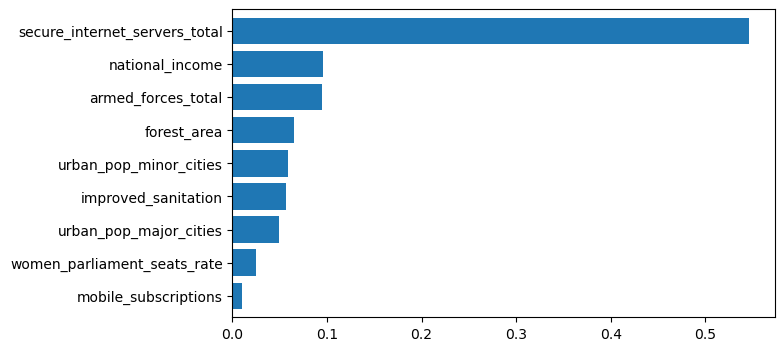

In [94]:
# Importancia de las covariables

# Extract feature importance determined by RF model
feature_imp = pd.Series(modelo_select.feature_importances_, index=X.columns)
feature_imp.sort_values(ascending=True, inplace=True)

# Creating a bar plot
feature_imp.plot(kind='barh', width=0.8, figsize=(7,4));

In [97]:
# guardar respuestas

# Create a submission_df
d = {'id': test.index, 'life_expectancy': y_pred}
submission_df = pd.DataFrame(data=d)
submission_df.to_csv('submissions0.csv',index=False)
# submission_df
